In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/900k-spotify/final_milliondataset_BERT_500K_revised.json
/kaggle/input/900k-spotify/spotify_dataset.csv
/kaggle/input/900k-spotify/900k Definitive Spotify Dataset.json
/kaggle/input/music-with-emotions-cleaned/deep_cleaned_muse_with_english_lyrics_only.csv


In [82]:
df=pd.read_csv("/kaggle/input/900k-spotify/spotify_dataset.csv")

In [83]:
df.tail()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
551438,박혜진 Park Hye Jin,Can you,Can you be my (Can you be my) Can you be my (C...,03:39,joy,house,Can you (Galcher Lustwerk Remix),14th October 2020,B min,140,...,0,LXST CXNTURY,NEVER EXISTED,0.946429,"Occvlt,StoneDogg",ALIZAY,0.926155,Peaches,Light in Places,0.923749
551439,심형진 Hyungjin Sim,Lim Han Byul Lee Hyuk - Prayer English Transl...,[Verse] I gave you my everything But I see I c...,08:47,joy,metalcore,비 준비하시니 Psalm_147,19th April 2022,G# Maj,128,...,0,Kari Jobe,No Fear Live,0.991961,"The Belonging Co,Kari Jobe",Closer To Your Heart,0.990956,Saintseneca,Pillar of Na,0.990385
551440,우정하,Memories Smiling Tears Remix,"[Tasha] Hell on earth, watching ...",03:53,sadness,hip hop,MEMORY,30th August 2023,G# min,75,...,0,Manic Street Preachers,People Give In,0.982809,Vinyl Theatre,Gold,0.980835,Unspoken,Life in the Death of Me,0.980171
551441,제노,Come Back to Me,[Verse] Gifts and flowers lay upon the lid Of ...,03:12,sadness,hip hop,2008 to me again,3rd June 2008,E Maj,126,...,0,Bonnie Raitt,I Can't Help Myself,0.983805,J. Roddy Walston & The Business,Bad Habits,0.982425,Idina Menzel,Damsel In Distress,0.975935
551442,코케,I Wanna Be With You,I wanna b with you I wanna b with you baby Yea...,03:32,love,hip hop,I Wanna Be With You : Originally Performed By ...,4th November 2020,D Maj,100,...,0,Ameritz - Karaoke,Roxanne 97 Puff Daddy Remix,0.987132,Ameritz - Karaoke,Roxanne,0.987132,ProSource Karaoke,Get Back Single Version,0.984674


In [84]:
df['emotion'].value_counts()

emotion
joy          209009
sadness      171078
anger        109678
fear          28097
love          27963
surprise       5592
True             17
Love              3
pink              2
angry             1
thirst            1
confusion         1
interest          1
Name: count, dtype: int64

In [85]:
df[df['emotion'] == 'love']

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,...,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
5,!!!,All U Writers,All you writers Get out your pens and write Al...,05:22,love,hip hop,All U Writers / Gonna Guetta Stomp,27th April 2015,B min,122,...,0,Wish & Fonda Rae,Touch Me All Night Long,0.980839,Gary Numan,War Songs,0.980527,Little Dragon,Forever,0.980209
145,"""Weird Al"" Yankovic",Do I Creep You Out,I know that you don't know me very well We've ...,02:46,love,"rock,pop,comedy",Straight Outta Lynwood,26th September 2006,C# Maj,144,...,0,Christina Aguilera,Keeps Gettin' Better,0.977084,Ayreon,Day Eight: School,0.975858,Christina Aguilera,Keeps Gettin Better,0.975671
163,"""Weird Al"" Yankovic",Syndicated Inc.,My whole family loves 'Three's Company' See th...,03:57,love,"rock,pop,comedy",Bad Hair Day,31st December 1996,C Maj,118,...,0,Leeland,Burning With Your Love Live,0.991836,KGA Berg,Ever Somber,0.990431,Tor Miller,Always,0.987654
199,"""Weird Al"" Yankovic",Airline Amy,Met this pretty young stewardess on a non-stop...,03:50,love,"rock,pop,comedy",Off The Deep End,1st January 1992,F# min,152,...,0,Mo-Dettes,White Mice,0.994204,Southern Culture on the Skids,King of the Mountain,0.993905,Indigo Girls,Go,0.992444
252,$atori Zoom,BARRACUDA,[Chorus] She call me Luda bitch I rollout with...,02:08,love,hip hop,BARRACUDA,15th August 2019,D Maj,164,...,0,"Rich The Kid,French Montana",MegaDeath,0.984073,Quadeca,Exposed RiceGum Diss Track,0.981533,"Moneybagg Yo,Ari",Brain Dead,0.973412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551354,歌っちゃ王,Longing,Kizutsuke atta kotoba mo Kasaneta namida mo...,07:43,love,"pop,j-pop,dream pop",Longing ~跡切れたmelody~(カラオケ)[原曲歌手:X JAPAN],12th October 2021,D# Maj,77,...,0,Aleah,Sacrifice,0.982795,Ulver,Coming Home,0.973148,Spacemen 3,Hypnotized,0.966786
551374,生 Conform 死,Nasty,"I've got everything I'd ever need A home, lovi...",02:58,love,hip hop,Vol I: Cigarette Lullaby,12th November 2016,F# Maj,87,...,0,Vybz Kartel,Make Up Break Up,0.986382,Demrick,Streets Dont Love You Back,0.984057,Dan Bull,San Andreas,0.982106
551376,百合絢斗,Touch You Kashima Ver.,"Ah, ah, ah, ah, ah I don't need simple words B...",01:33,love,pop,アニメ『ヤリチン☆ビッチ部』主題歌「Touch You」,15th August 2018,G# min,135,...,0,Gossip,Where the Girls Are,0.989354,Maroon 5,Little Of Your Time,0.987044,Maroon 5,Little of Your Time,0.986242
551436,박진석,Jung Seung Hwan - Day Night English Translation,It was a gentle sound A light that shined in m...,03:42,love,hip hop,Jinseok Park`s Trot Dictionary,1st April 2011,C min,136,...,0,Ziggy Marley,Elizabeth,0.990341,Kylie Minogue,Secret Take You Home,0.978380,UB40,Seasons,0.977563


In [86]:
df2 = pd.read_csv("/kaggle/input/music-with-emotions-cleaned/deep_cleaned_muse_with_english_lyrics_only.csv")

In [87]:
df2.head()

,track,artist,final_emotion,lyrics,cleaned_lyrics
0,'Till I Collapse,Eminem,anger,"'Cause sometimes you just feel tired, feel wea...",cause sometimes feel tired feel weak feel weak...
1,St. Anger,Metallica,anger,St. Anger 'round my neck\r\nSt. Anger 'round m...,st anger round neck st anger round neck never ...
2,Speedin',Rick Ross,anger,Legendary\r\nRunners\r\nYou know me\r\n\r\nTri...,legendary runner know trilla every dollar coun...
3,Bamboo Banga,M.I.A.,anger,"Road runner, road runner\r\nGoing hundred mile...",road runner road runner going hundred mile per...
4,Die MF Die,Dope,anger,I don't need your forgiveness\r\nI don't need ...,dont need forgiveness dont need hate dont need...


In [88]:
df2['final_emotion'].value_counts()

final_emotion
sadness       7581
joy           7256
reflective    6504
excitement    6234
calm          5169
neutral       4761
romantic      3670
anger         2843
fear          1468
Name: count, dtype: int64

In [89]:
# Extract only needed columns and rename to match your dataset
subset = df[['song', 'Artist(s)', 'emotion', 'text']].copy()
subset.rename(columns={
    'song': 'track',
    'Artist(s)': 'artist',
    'emotion': 'final_emotion',
    'text': 'lyrics'
}, inplace=True)


In [90]:
subset['final_emotion'].value_counts()


final_emotion
joy          209009
sadness      171078
anger        109678
fear          28097
love          27963
surprise       5592
True             17
Love              3
pink              2
angry             1
thirst            1
confusion         1
interest          1
Name: count, dtype: int64

In [91]:
subset[subset['final_emotion'] == 'love']

,track,artist,final_emotion,lyrics
5,All U Writers,!!!,love,All you writers Get out your pens and write Al...
145,Do I Creep You Out,"""Weird Al"" Yankovic",love,I know that you don't know me very well We've ...
163,Syndicated Inc.,"""Weird Al"" Yankovic",love,My whole family loves 'Three's Company' See th...
199,Airline Amy,"""Weird Al"" Yankovic",love,Met this pretty young stewardess on a non-stop...
252,BARRACUDA,$atori Zoom,love,[Chorus] She call me Luda bitch I rollout with...
...,...,...,...,...
551354,Longing,歌っちゃ王,love,Kizutsuke atta kotoba mo Kasaneta namida mo...
551374,Nasty,生 Conform 死,love,"I've got everything I'd ever need A home, lovi..."
551376,Touch You Kashima Ver.,百合絢斗,love,"Ah, ah, ah, ah, ah I don't need simple words B..."
551436,Jung Seung Hwan - Day Night English Translation,박진석,love,It was a gentle sound A light that shined in m...


In [92]:
subset.tail()

,track,artist,final_emotion,lyrics
551438,Can you,박혜진 Park Hye Jin,joy,Can you be my (Can you be my) Can you be my (C...
551439,Lim Han Byul Lee Hyuk - Prayer English Transl...,심형진 Hyungjin Sim,joy,[Verse] I gave you my everything But I see I c...
551440,Memories Smiling Tears Remix,우정하,sadness,"[Tasha] Hell on earth, watching ..."
551441,Come Back to Me,제노,sadness,[Verse] Gifts and flowers lay upon the lid Of ...
551442,I Wanna Be With You,코케,love,I wanna b with you I wanna b with you baby Yea...


In [93]:
target_classes = ['romantic', 'fear', 'anger']

# Normalize to lowercase
subset['final_emotion'] = subset['final_emotion'].str.lower().str.strip()

# Map similar emotion names to your dataset's naming
emotion_map = {
    'love': 'romantic',   # unify "love" -> "romantic"
    'anger': 'anger',
    'fear': 'fear'
}

subset = subset[subset['final_emotion'].isin(emotion_map.keys())]

# Apply mapping to rename the emotion column
subset['final_emotion'] = subset['final_emotion'].map(emotion_map)


In [94]:
[subset['final_emotion'] == 'romantic']

[5          True
 14        False
 15        False
 16        False
 18        False
           ...  
 551392    False
 551407    False
 551413    False
 551436     True
 551442     True
 Name: final_emotion, Length: 165741, dtype: bool]

In [95]:
subset.head(2)

,track,artist,final_emotion,lyrics
5,All U Writers,!!!,romantic,All you writers Get out your pens and write Al...
14,All My Heroes Are Weirdos,!!!,anger,"Hey ho, there’s an open casting call for heroe..."


In [96]:
target_classes = [ 'fear', 'anger','love']
subset = subset[subset['final_emotion'].str.lower().isin(target_classes)]


In [97]:
subset['final_emotion'].value_counts()


final_emotion
anger    109678
fear      28097
Name: count, dtype: int64

In [101]:
subset_balanced['final_emotion'].value_counts()

final_emotion
fear        4991
anger       4987
romantic    4954
Name: count, dtype: int64

In [ ]:
!pip install langdetect

In [99]:
from langdetect import detect
print(detect("Bonjour tout le monde"))

fr


In [100]:
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def is_english(text):
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

subset_balanced = subset_balanced[subset_balanced['lyrics'].apply(is_english)]


In [102]:
subset_balanced['final_emotion'].value_counts()

final_emotion
fear        4991
anger       4987
romantic    4954
Name: count, dtype: int64

In [103]:
import pandas as pd

df_main = pd.read_csv("/kaggle/input/music-with-emotions-cleaned/deep_cleaned_muse_with_english_lyrics_only.csv")


In [104]:
df_main.head()

,track,artist,final_emotion,lyrics,cleaned_lyrics
0,'Till I Collapse,Eminem,anger,"'Cause sometimes you just feel tired, feel wea...",cause sometimes feel tired feel weak feel weak...
1,St. Anger,Metallica,anger,St. Anger 'round my neck\r\nSt. Anger 'round m...,st anger round neck st anger round neck never ...
2,Speedin',Rick Ross,anger,Legendary\r\nRunners\r\nYou know me\r\n\r\nTri...,legendary runner know trilla every dollar coun...
3,Bamboo Banga,M.I.A.,anger,"Road runner, road runner\r\nGoing hundred mile...",road runner road runner going hundred mile per...
4,Die MF Die,Dope,anger,I don't need your forgiveness\r\nI don't need ...,dont need forgiveness dont need hate dont need...


In [106]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt_tab')  # 👈 new addition for latest NLTK

from nltk.tokenize import word_tokenize
nltk.download('punkt'); nltk.download('wordnet'); nltk.download('stopwords')



stop_words = set(stopwords.words('english')).union({
    'aa', 'aaa', 'ah', 'aah', 'ooh', 'ohh', 'la', 'na', 'yeah', 'yo', 'ha', 'uh', 'mmm', 'woah'
})
lemmatizer = WordNetLemmatizer()

def clean_lyrics(text):
    text = text.lower()
    text = re.sub(r'\b(?:ah+|aa+|ha+|na+|la+|oh+|oo+|uh+|ya+|woo+)\b', '', text)
    text = re.sub(r'(\b[a-z]+\b)\s+\1', '', text)  # fixed regex for removing immediate repetitions
    text = re.sub(r'\[.*?\]', '', text)              # remove [chorus], [verse]
    text = re.sub(r'[^a-z\s]', '', text)             # remove punctuation/numbers
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'\d+x', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

subset_balanced["cleaned_lyrics"] = subset_balanced["lyrics"].apply(clean_lyrics)


[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
subset_balanced

,track,artist,final_emotion,lyrics,cleaned_lyrics
512917,Eric the Red,Týr,anger,"Why I take refuge here, my father was Outlawed...",take refuge father outlawed old land east stor...
505567,HD Bling,"Translee,GFMBRYYCE",anger,"[Chorus: Translee] I got a lil steez on me, bi...",got lil steez bitch cant freeze shit goin flee...
138376,Far From Over,"Dsavv,Akz",anger,[Intro] (De-De-De-De-DefBeats did them dirty) ...,dededededefbeats dirty o get shell tk beat mad...
1701,You Dont Know,13th Floor Elevators,anger,There you are again standing down below me Hon...,standing honestly believe something show deep ...
64164,Best,"Borgore,Parker",anger,[Verse 1] I don't mean to sound upset But ther...,dont mean sound upset thereomeone sleeping bed...
...,...,...,...,...,...
365168,What Am I Living For,Percy Sledge,romantic,What am I living for If not for you What am I ...,living living living nobody else nobody else l...
490995,Hot Potato,The Wiggles,romantic,"[Verse 1: Greg] Hot potato, Hot potato Hot pot...",hot potato hot potato hot potato hot potato ho...
226961,Try to Remember,Jerry Orbach,romantic,[Verse 1] Try to remember the kind of Septembe...,try remember kind september life slow mellow t...
73491,You Can Always Count on Me,Bård Christiansen,romantic,[Intro: Oolie] I'm one of a long line of good ...,im one long line good girl choose wrong guy sw...


In [109]:
subset_balanced = subset_balanced[['track', 'artist', 'final_emotion', 'lyrics', 'cleaned_lyrics']]
df2 = df2[['track', 'artist', 'final_emotion', 'lyrics', 'cleaned_lyrics']]


In [110]:
merged_df = pd.concat([df_main, subset_balanced], ignore_index=True)


In [111]:
merged_df.drop_duplicates(subset=['lyrics'], inplace=True)
merged_df.reset_index(drop=True, inplace=True)


In [112]:
merged_df['final_emotion'].value_counts()

final_emotion
romantic      8303
anger         7576
sadness       7416
joy           7130
reflective    6391
fear          6251
excitement    6131
calm          5087
neutral       4680
Name: count, dtype: int64

In [113]:
merged_df.to_csv("merged_music_dataset.csv", index=False)
print("✅ Merged dataset saved! Shape:", merged_df.shape)
print(merged_df['final_emotion'].value_counts())


✅ Merged dataset saved! Shape: (58965, 5)
final_emotion
romantic      8303
anger         7576
sadness       7416
joy           7130
reflective    6391
fear          6251
excitement    6131
calm          5087
neutral       4680
Name: count, dtype: int64


In [2]:
import pandas as pd
df=pd.read_csv("merged_music_dataset.csv")

In [3]:
df.head(2)

,track,artist,final_emotion,lyrics,cleaned_lyrics
0,'Till I Collapse,Eminem,anger,"'Cause sometimes you just feel tired, feel wea...",cause sometimes feel tired feel weak feel weak...
1,St. Anger,Metallica,anger,St. Anger 'round my neck\r\nSt. Anger 'round m...,st anger round neck st anger round neck never ...


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
 # = pd.read_csv("deep_cleaned_muse_with_english_lyrics_only.csv")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_lyrics"], df["final_emotion"], 
    test_size=0.2, random_state=42, stratify=df["final_emotion"]
)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2), 
    min_df=3, 
    max_df=0.6,
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [6]:
print(tfidf.get_feature_names_out()[:50])


['aaah' 'aahh' 'abandon' 'abandoned' 'abc' 'abide' 'ability' 'ablaze'
 'able' 'aboard' 'abortion' 'absence' 'absolute' 'absolutely' 'abstract'
 'absurd' 'abuse' 'abused' 'abyss' 'ac' 'accent' 'accept' 'accepted'
 'access' 'accident' 'according' 'account' 'ace' 'ache' 'achieve' 'aching'
 'acid' 'acre' 'across' 'across face' 'across floor' 'across ocean'
 'across room' 'across sea' 'across sky' 'across street' 'across world'
 'act' 'act fool' 'act like' 'acted' 'actin' 'actin like' 'acting'
 'acting like']


In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [8]:
model = LinearSVC(class_weight='balanced')

In [9]:
model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       anger       0.41      0.42      0.42      1515
        calm       0.15      0.18      0.17      1018
  excitement       0.14      0.14      0.14      1226
        fear       0.31      0.32      0.31      1250
         joy       0.21      0.20      0.20      1426
     neutral       0.13      0.14      0.13       936
  reflective       0.17      0.17      0.17      1278
    romantic       0.38      0.38      0.38      1661
     sadness       0.21      0.19      0.20      1483

    accuracy                           0.25     11793
   macro avg       0.24      0.24      0.24     11793
weighted avg       0.25      0.25      0.25     11793



              precision    recall  f1-score   support

       anger       0.41      0.42      0.42      1515
        calm       0.15      0.18      0.17      1018
  excitement       0.14      0.14      0.14      1226
        fear       0.31      0.32      0.31      1250
         joy       0.21      0.20      0.20      1426
     neutral       0.13      0.14      0.13       936
  reflective       0.17      0.17      0.17      1278
    romantic       0.38      0.38      0.38      1661
     sadness       0.21      0.19      0.20      1483

    accuracy                           0.25     11793
   macro avg       0.24      0.24      0.24     11793
weighted avg       0.25      0.25      0.25     11793

Confusion Matrix:
 [[643  66 128 148 100 104 110 106 110]
 [ 43 181 111  77 140  71 125 143 127]
 [127 130 169 129 165 113 124 148 121]
 [161  95 107 402  96  87  98  88 116]
 [104 146 185 115 282 111 146 185 152]
 [122  78  98 107  97 128 113  92 101]
 [ 97 155 131 108 151 122 211 123 180]
 [1

<Figure size 1200x800 with 0 Axes>

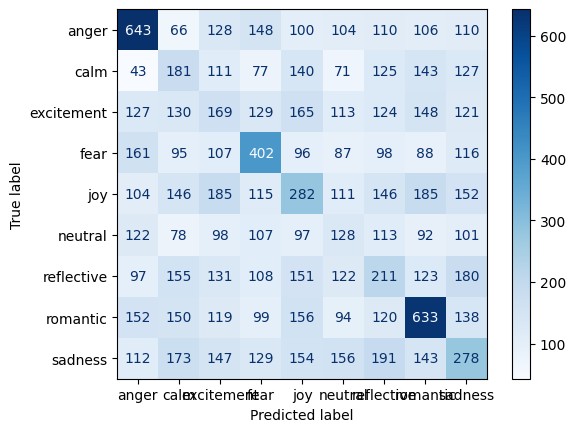

In [10]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(12, 8))  # adjust width x height in inches

# Train model
model.fit(X_train_tfidf, y_train)

# Predict
preds = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


In [11]:
from sentence_transformers import SentenceTransformer
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

model = SentenceTransformer('all-MiniLM-L6-v2')  # lightweight & fast
X_train_emb = model.encode(X_train, show_progress_bar=True)
X_test_emb = model.encode(X_test, show_progress_bar=True)

svm = LinearSVC()
svm.fit(X_train_emb, y_train)
y_pred = svm.predict(X_test_emb)

print(classification_report(y_test, y_pred))


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyError: 42768

In [12]:
print(type(X_train))
print(X_train.head())
print(X_train.isnull().sum())


<class 'pandas.core.series.Series'>
52843    always held head wave paddling around pretendi...
37108    winter came bedroom today falling row covering...
45864    cast stone wayward daughter lay gavel robe lur...
52555    world strange world strange game shooting rang...
5272     underneath table shade leave living arabesque ...
Name: cleaned_lyrics, dtype: object
0


In [13]:
X_train = X_train.dropna()
X_test = X_test.dropna()


In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

model = SentenceTransformer('all-MiniLM-L6-v2')

X_train_emb = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_emb = model.encode(X_test.tolist(), show_progress_bar=True)

svm = LinearSVC()
svm.fit(X_train_emb, y_train)
y_pred = svm.predict(X_test_emb)

print(classification_report(y_test, y_pred))


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 991c47ce-8660-44e4-a3a5-ebbcbbea1676)')' thrown while requesting HEAD https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2/resolve/main/./modules.json
Retrying in 1s [Retry 1/5].
Batches: 100%|██████████| 369/369 [04:16<00:00,  1.44it/s]


              precision    recall  f1-score   support

       anger       0.35      0.60      0.44      1515
        calm       0.16      0.05      0.07      1018
  excitement       0.15      0.04      0.06      1226
        fear       0.26      0.32      0.29      1250
         joy       0.22      0.21      0.22      1426
     neutral       0.21      0.01      0.02       936
  reflective       0.18      0.07      0.10      1278
    romantic       0.30      0.55      0.39      1661
     sadness       0.20      0.28      0.23      1483

    accuracy                           0.27     11793
   macro avg       0.23      0.24      0.20     11793
weighted avg       0.23      0.27      0.22     11793



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Assume you have preprocessed X_train, y_train, X_test, y_test
# First, create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),  # Use TF-IDF with bigrams
    ('smote', SMOTE(random_state=42)),             # Address class imbalance
    ('svm', SVC(class_weight='balanced'))           # SVM with balanced class weights
])

# Define a grid of hyperparameters to search
param_grid = {
    'tfidf__max_df': [0.95, 1.0],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 0.1, 1]
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.2f}")

# Make predictions on the test set with the best model
y_pred = grid_search.predict(X_test)

# Print the final classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 